In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")



In [3]:
results = {
    'AD': {
        'As-Is': {
            'cost': 213,
            'wait': 17.13,
        },
        'Optimized': {
            'cost': 120,
            'wait': 0.52,
        }
    },
    'JS': {
        'As-Is': {
            'cost': 250,
            'wait': 1.45,
        },
        'Optimized': {
            'cost': 166,
            'wait': 0.59,
        }
    },
    'RC': {
        'As-Is': {
            'cost': 67,
            'wait': 2.30,
        },
        'Optimized': {
            'cost': 49,
            'wait': 2.03,
        }
    },
    'SMDT': {
        'As-Is': {
            'cost': 254,
            'wait': 2.78,
        },
        'Optimized': {
            'cost': 179,
            'wait': 0.6,
        }
    },
    'Arr': {
        'As-Is': {
            'cost': 88,
            'wait': 0.74,
        },
        'Optimized': {
            'cost': 53,
            'wait': 0.69,
        }
    },
}

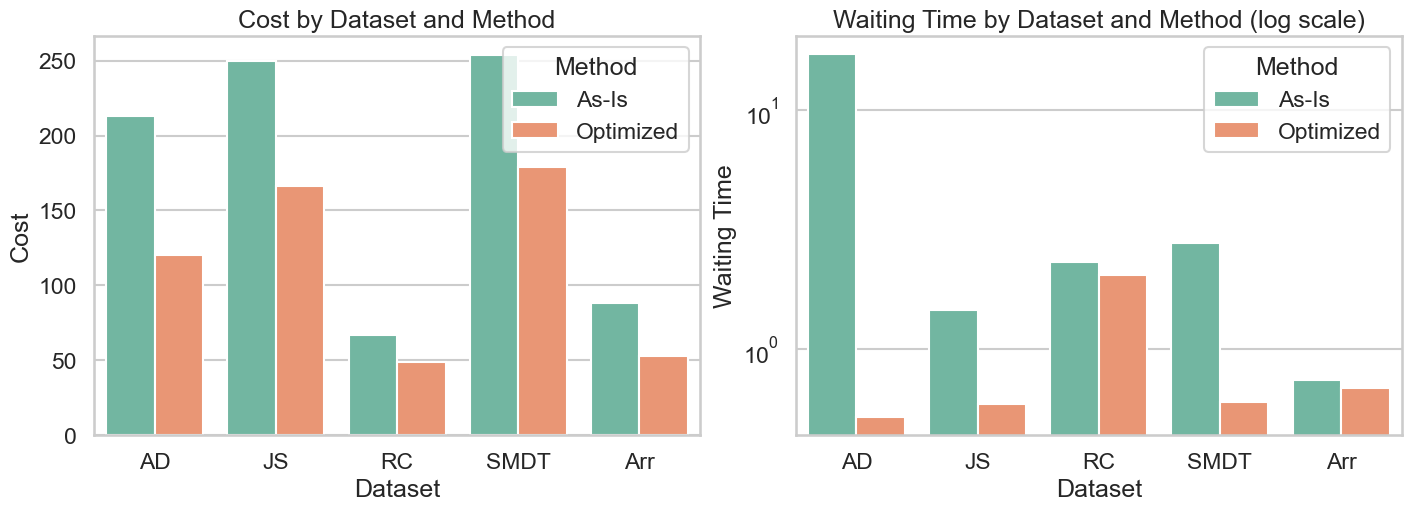

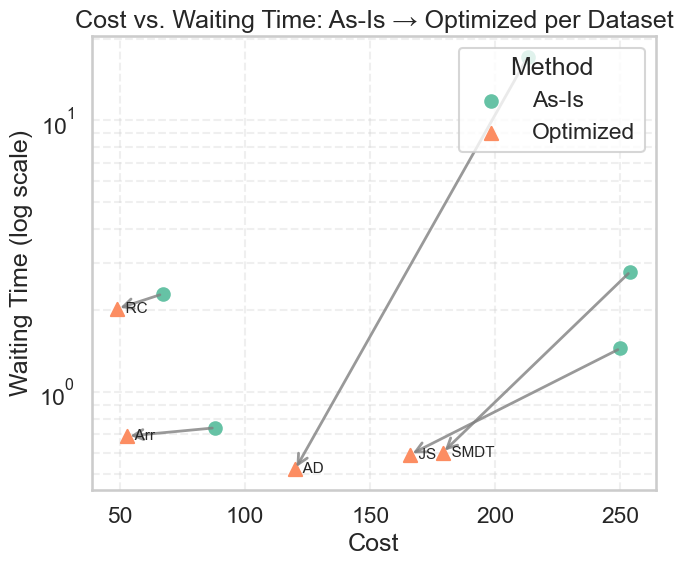

In [4]:
# Build tidy DataFrame from results dict
rows = []
for dataset, methods in results.items():
    for method, metrics in methods.items():
        rows.append({
            'Dataset': dataset,
            'Method': method,
            'Cost': metrics['cost'],
            'Wait': metrics['wait'],
        })

df = pd.DataFrame(rows)

# Order datasets for consistent display
order = ['AD', 'JS', 'RC', 'SMDT', 'Arr']
df['Dataset'] = pd.Categorical(df['Dataset'], categories=order, ordered=True)

palette = {
    'As-Is': sns.color_palette('Set2')[0],
    'Optimized': sns.color_palette('Set2')[1],
}

# 1) Side-by-side bars for Cost and Wait (Wait on log scale)
fig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

sns.barplot(
    data=df, x='Dataset', y='Cost', hue='Method', palette=palette, ax=axes[0]
)
axes[0].set_title('Cost by Dataset and Method')
axes[0].set_xlabel('Dataset')
axes[0].set_ylabel('Cost')
axes[0].legend(title='Method')

sns.barplot(
    data=df, x='Dataset', y='Wait', hue='Method', palette=palette, ax=axes[1]
)
axes[1].set_yscale('log')
axes[1].set_title('Waiting Time by Dataset and Method (log scale)')
axes[1].set_xlabel('Dataset')
axes[1].set_ylabel('Waiting Time')
axes[1].legend(title='Method')

for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(0)

plt.show()

# 2) Scatter with arrows showing improvement from As-Is to Optimized
plt.figure(figsize=(7, 6))

# Plot points and arrows per dataset
for dataset in order:
    subset = df[df['Dataset'] == dataset]
    as_is = subset[subset['Method'] == 'As-Is'].iloc[0]
    opt = subset[subset['Method'] == 'Optimized'].iloc[0]

    # Points
    plt.scatter(as_is['Cost'], as_is['Wait'], color=palette['As-Is'], label='As-Is' if dataset == order[0] else "")
    plt.scatter(opt['Cost'], opt['Wait'], color=palette['Optimized'], marker='^', s=90, label='Optimized' if dataset == order[0] else "")

    # Arrow
    plt.annotate(
        '',
        xy=(opt['Cost'], opt['Wait']),
        xytext=(as_is['Cost'], as_is['Wait']),
        arrowprops=dict(arrowstyle='->', color='gray', lw=2, alpha=0.8)
    )

    # Dataset label near optimized point
    plt.text(opt['Cost'], opt['Wait'], f"  {dataset}", va='center', ha='left', fontsize=11)

plt.yscale('log')
plt.xlabel('Cost')
plt.ylabel('Waiting Time (log scale)')
plt.title('Cost vs. Waiting Time: As-Is → Optimized per Dataset')
plt.legend(title='Method', loc='upper right')
plt.grid(True, which='both', ls='--', alpha=0.3)
plt.tight_layout()
plt.show()


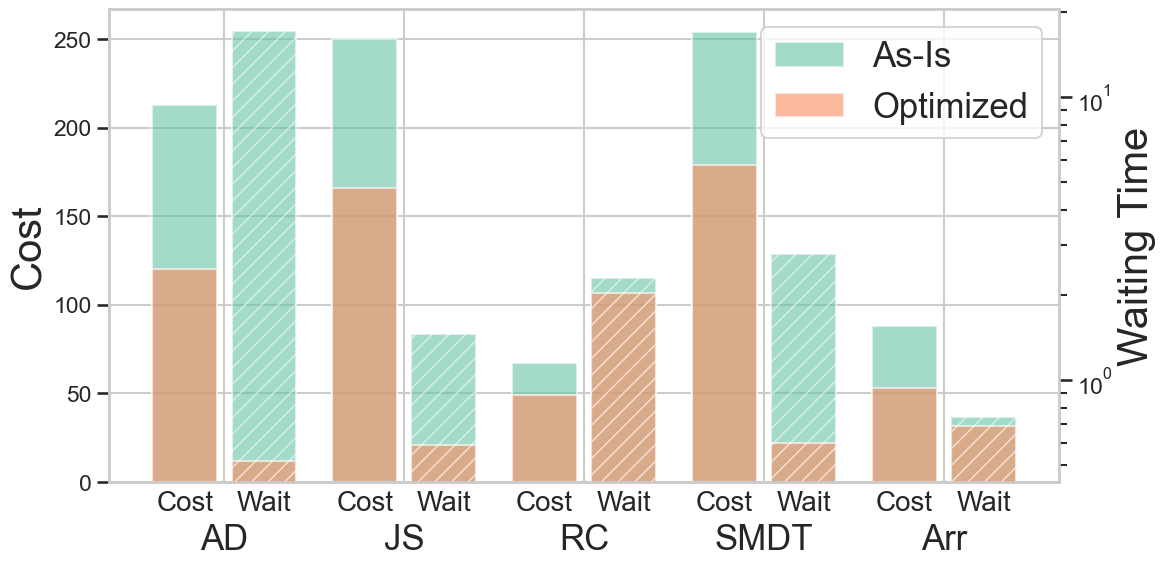

In [27]:
# Dual-axis bar plot with overlaid bars per metric per dataset
fig, ax_cost = plt.subplots(figsize=(12, 6))
ax_wait = ax_cost.twinx()

alpha = 0.6
bar_width = 0.36

order = ['AD', 'JS', 'RC', 'SMDT', 'Arr']

datasets = order
x = np.arange(len(datasets))

# Positions: left = cost, right = wait
cost_x = x - 0.22
wait_x = x + 0.22

# Collect arrays in dataset order
as_is_cost = [results[d]['As-Is']['cost'] for d in datasets]
opt_cost   = [results[d]['Optimized']['cost'] for d in datasets]
as_is_wait = [results[d]['As-Is']['wait'] for d in datasets]
opt_wait   = [results[d]['Optimized']['wait'] for d in datasets]

# Bars: same x for As-Is and Optimized at each metric position (overlay with alpha)
# Cost on left y-axis
b1 = ax_cost.bar(cost_x, as_is_cost, width=bar_width, color=palette['As-Is'], alpha=alpha, label='As-Is (Cost)')
b2 = ax_cost.bar(cost_x, opt_cost,   width=bar_width, color=palette['Optimized'], alpha=alpha, label='Optimized (Cost)')

# Wait on right y-axis
b3 = ax_wait.bar(wait_x, as_is_wait, width=bar_width, color=palette['As-Is'], alpha=alpha, hatch='//', label='As-Is (Wait)')
b4 = ax_wait.bar(wait_x, opt_wait,   width=bar_width, color=palette['Optimized'], alpha=alpha, hatch='//', label='Optimized (Wait)')

# Axes formatting
ax_cost.set_xticks(x)
ax_cost.set_xticklabels(datasets, fontsize=25, y=-0.05)
ax_cost.set_xlabel('', fontsize=30)
ax_cost.set_ylabel('Cost', fontsize=30)
ax_wait.set_ylabel('Waiting Time', fontsize=30)
# ax_cost.set_title('Cost and Waiting Time per Dataset (Dual Axis, Overlaid Bars)')

# Grid on primary axis
# ax_cost.grid(True, axis='y', linestyle='--', alpha=0.3)

# Build a combined legend
from matplotlib.patches import Patch
legend_patches = [
    Patch(facecolor=palette['As-Is'], alpha=alpha, label='As-Is'),
    Patch(facecolor=palette['Optimized'], alpha=alpha, label='Optimized'),
    # Patch(facecolor='gray', alpha=0.0, hatch='//', label='Wait Axis'),
]
ax_cost.legend(handles=legend_patches, title='', loc='best', fontsize=25)

# Sub-labels to indicate left/right bars meaning
for xi in x:
    ax_cost.text(xi - 0.22, ax_cost.get_ylim()[0]-5, 'Cost', ha='center', va='top', fontsize=20)
    ax_cost.text(xi + 0.22, ax_cost.get_ylim()[0]-5, 'Wait', ha='center', va='top', fontsize=20)

# remove all grid lines
# ax_cost.grid(False)
ax_wait.grid(False)

# log scale on right y-axis
ax_wait.set_yscale('log')
# remove wait time y-axis ticks

fig.tight_layout()
plot_path = f'synthetic_results.pdf'
plt.savefig(plot_path)
plt.show()


In [28]:
col1 = [22.10, 28.93, 35.88, 30.55, 68.04, 25.38, 23.32]
col2 = [18.61, 80.16, 51.83, 34.68, 79.14, 0.75, 96.30]
col3 = [22.82, 31.42, 38.88, 32.39, 51.92, 27.40, 25.04]
col4 = [13.79, 77.03, 55.35, 28.39, 85.81, 23.75, 97.81]
col5 = [20.19, 54.74, 33.67, 34.67, 62.40, 27.80, 24.71]
col6 = [18.26, 78.86, 52.36, 26.00, 90.60, 41.38, 96.54]
col7 = [22.24, 32.30, 40.32, 33.14, 55.00, 21.99, 26.53]
col8 = [6.26, 84.21, 40.68, 32.32, 88.61, 35.75, 97.69]

print(np.mean(col1))
print(np.mean(col2))
print(np.mean(col3))
print(np.mean(col4))
print(np.mean(col5))
print(np.mean(col6))
print(np.mean(col7))
print(np.mean(col8))

33.457142857142856
51.63857142857143
32.83857142857143
54.56142857142857
36.88285714285714
57.71428571428572
33.074285714285715
55.074285714285715
